In [ ]:
# import thu vien can thietthiet
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam,SGD
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# cap acesss cho google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# dinh dang lai bien train
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
# lay data train tu drive
training_set=train_datagen.flow_from_directory('drive/MyDrive/dataFace/train',target_size=(224,224), batch_size=32, class_mode='categorical')

Found 2250 images belonging to 15 classes.


In [ ]:
# lay data test tu drivedrive
test_set=train_datagen.flow_from_directory('drive/MyDrive/dataFace/validation',target_size=(224,224), batch_size=32, class_mode='categorical')

Found 453 images belonging to 15 classes.


In [ ]:
# kiẻm tra lai cac class trong bien train
training_set.class_indices

{'hoailinh': 0,
 'hongdang': 1,
 'hongvan': 2,
 'huavivan': 3,
 'lanphuong': 4,
 'manhtruong': 5,
 'ngothanhvan': 6,
 'ninhduonglanngoc': 7,
 'tangthanhha': 8,
 'thaihoa': 9,
 'thanhhuong': 10,
 'thuquynh': 11,
 'tranthanh': 12,
 'trungdung': 13,
 'vietanh': 14}

In [ ]:
# kiẻm tra lai cac class trong bien test
test_set.class_indices

{'hoailinh': 0,
 'hongdang': 1,
 'hongvan': 2,
 'huavivan': 3,
 'lanphuong': 4,
 'manhtruong': 5,
 'ngothanhvan': 6,
 'ninhduonglanngoc': 7,
 'tangthanhha': 8,
 'thaihoa': 9,
 'thanhhuong': 10,
 'thuquynh': 11,
 'tranthanh': 12,
 'trungdung': 13,
 'vietanh': 14}

In [ ]:
model=Sequential()
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(224,224,3))) # Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) # Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) # Tích chập 256 lần với mỗi lần là 3 hàng 3 cột
model.add(MaxPooling2D(2,2))
model.add(Conv2D(512,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) # Tích chập 512 lần với mỗi lần là 3 hàng 3 cột
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(15,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 256)      0

In [ ]:
opt = SGD(learning_rate=0.01,momentum=0.9)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(training_set,epochs=100,batch_size=100,verbose=1, validation_data=test_set, callbacks=[EarlyStopping(monitor='val_loss', patience=30)])

Epoch 1/100
71/71 [==============================] - 531s 7s/step - loss: 2.9889 - accuracy: 0.1022 - val_loss: 2.7004 - val_accuracy: 0.0993
Epoch 2/100
71/71 [==============================] - 35s 499ms/step - loss: 2.3694 - accuracy: 0.2316 - val_loss: 2.5616 - val_accuracy: 0.1501
Epoch 3/100
71/71 [==============================] - 35s 494ms/step - loss: 1.6634 - accuracy: 0.4698 - val_loss: 1.9568 - val_accuracy: 0.4040
Epoch 4/100
71/71 [==============================] - 35s 498ms/step - loss: 1.0518 - accuracy: 0.6733 - val_loss: 1.7422 - val_accuracy: 0.5188
Epoch 5/100
71/71 [==============================] - 37s 515ms/step - loss: 0.5156 - accuracy: 0.8342 - val_loss: 0.9112 - val_accuracy: 0.6998
Epoch 6/100
71/71 [==============================] - 36s 502ms/step - loss: 0.4017 - accuracy: 0.8818 - val_loss: 0.9524 - val_accuracy: 0.7528
Epoch 7/100
71/71 [==============================] - 35s 499ms/step - loss: 0.2430 - accuracy: 0.9302 - val_loss: 0.8402 - val_accuracy: 0

<function matplotlib.pyplot.show>

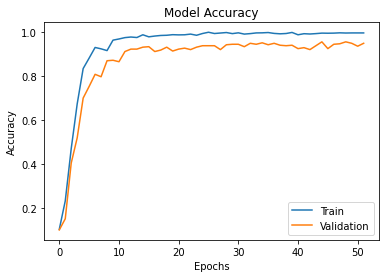

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [ ]:
model.save("face.h5")

In [ ]:
model=load_model('face.h5')

[[2.9398799e-02 7.0245024e-03 8.1085025e-05 8.1519730e-02 5.9142048e-06
  2.4962114e-02 5.8299932e-04 1.2802564e-03 2.8881648e-06 1.6946695e-08
  9.2164968e-04 1.6683850e-06 1.2396849e-02 8.3549875e-01 6.3227541e-03]]
[13]
0.83549875
Trung Dung


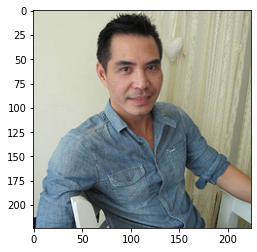

In [ ]:
from keras.models import load_model
from PIL import Image, ImageOps
import numpy as np

# 'hoailinh': 0,
#  'hongdang': 1,
#  'hongvan': 2,
#  'huavivan': 3,
#  'lanphuong': 4,
#  'manhtruong': 5,
#  'ngothanhvan': 6,
#  'ninhduonglanngoc': 7,
#  'tangthanhha': 8,
#  'thaihoa': 9,
#  'thanhhuong': 10,
#  'thuquynh': 11,
#  'tranthanh': 12,
#  'trungdung': 13,
#  'vietanh': 14

data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
image = Image.open('test.jpg')

size = (224, 224)
image = ImageOps.fit(image, size, Image.ANTIALIAS)

#turn the image into a numpy array
image_array = np.asarray(image)
# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
# Load the image into the array
data[0] = normalized_image_array

# run the inference
prediction = model.predict(data)
classIndex = np.argmax(prediction,axis=-1)
probabilityValue= np.amax(prediction)

print(prediction)
print(classIndex)
print(probabilityValue)
imgplot = plt.imshow(image)
if classIndex==0:
  print('Hoai Linh')
if classIndex==1:
  print('Hong Dang')
if classIndex==2:
  print('Hong Van')
if classIndex==3:
  print('Hua Vi Van')
if classIndex==4:
  print('Lan Phuong')
if classIndex==5:
  print('Manh Truong')
if classIndex==6:
  print('Ngo Thanh Van')
if classIndex==7:
  print('Ninh Duong Lan Ngoc')
if classIndex==8:
  print('Tang Thanh Ha')
if classIndex==9:
  print('Thai Hoa')
if classIndex==10:
  print('Thanh Huong')
if classIndex==11:
  print('Thu Quynh')
if classIndex==12:
  print('Tran Thanh')
if classIndex==13:
  print('Trung Dung')
if classIndex==14:
  print('Viet Anh')
plt.show()


[[1.4284763e-05 1.3821894e-08 3.9996355e-04 1.2499410e-04 2.0627825e-02
  9.7377825e-01 1.9983705e-07 2.4626005e-04 1.3644857e-05 1.6746646e-06
  1.0786752e-06 4.7828895e-03 2.3841133e-06 3.6082627e-06 2.8722318e-06]]
[5]


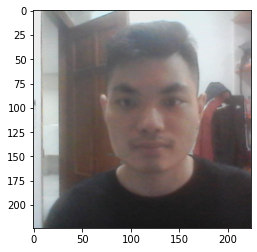

Manh Truong
Do giong la 0.97377825 %


In [ ]:
from keras.models import load_model
from PIL import Image, ImageOps
import numpy as np

# 'hoailinh': 0,
#  'hongdang': 1,
#  'hongvan': 2,
#  'huavivan': 3,
#  'lanphuong': 4,
#  'manhtruong': 5,
#  'ngothanhvan': 6,
#  'ninhduonglanngoc': 7,
#  'tangthanhha': 8,
#  'thaihoa': 9,
#  'thanhhuong': 10,
#  'thuquynh': 11,
#  'tranthanh': 12,
#  'trungdung': 13,
#  'vietanh': 14
model=load_model('drive/MyDrive/face.h5')
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
image = Image.open('test1.jpg')

size = (224, 224)
image = ImageOps.fit(image, size, Image.ANTIALIAS)

#turn the image into a numpy array
image_array = np.asarray(image)
# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
# Load the image into the array
data[0] = normalized_image_array

# run the inference
prediction = model.predict(data)
classIndex = np.argmax(prediction,axis=-1)
probabilityValue= np.amax(prediction)
print(prediction)
print(classIndex)
imgplot = plt.imshow(image)
plt.show()
if classIndex==0:
  print('Hoai Linh')
if classIndex==1:
  print('Hong Dang')
if classIndex==2:
  print('Hong Van')
if classIndex==3:
  print('Hua Vi Van')
if classIndex==4:
  print('Lan Phuong')
if classIndex==5:
  print('Manh Truong')
if classIndex==6:
  print('Ngo Thanh Van')
if classIndex==7:
  print('Ninh Duong Lan Ngoc')
if classIndex==8:
  print('Tang Thanh Ha')
if classIndex==9:
  print('Thai Hoa')
if classIndex==10:
  print('Thanh Huong')
if classIndex==11:
  print('Thu Quynh')
if classIndex==12:
  print('Tran Thanh')
if classIndex==13:
  print('Trung Dung')
if classIndex==14:
  print('Viet Anh')
print('Do giong la' , probabilityValue,'%')